In [120]:
from sklearn.datasets import fetch_openml
from statsmodels.stats.power import zt_ind_solve_power, tt_ind_solve_power
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from itertools import combinations
from scipy.stats import ttest_ind
import scipy.stats as st
from scipy.stats import ttest_1samp
from scipy.stats import kstest
from scipy.stats import chi2_contingenc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Завдання 1

Компанія хоче оновити сайт перегляду фільмів. Оновлення зробить сайт в рази швидшим. Керівництво припускає, що це оновлення вплине на купівлю послуг компанії (підписку). Зараз частка людей, які оформлюють підписку з тих, хто взагалі заходить на сайт = 43%. Проте оновлення буде потребувати додаткових вкладень у сервери, тому було вибрано межу +5% з якої зміна буде вигідна. Ви обговорили параметри для тесту і вирішили, що alpha = 3%, а beta = 10% (power = 90%).

a. Чи правильно компанія вибрала метрику для оцінки експерименту? Які є альтернативи? Які можуть виникнути виклики?

b. Скільки даних потрібно зібрати для експерименту?

c. Експеримент був проведений. Завантажте дані про підписки. Проведіть тест.

Прокоментуйте вибір тесту та його результат. Чи рекомендуєте вводити оновлення на всю систему?

In [147]:
alpha = 0.03
power = 1 - 0.1
p1 = 0.43
p2 = 0.48
q1 = 1 - p1
q2 = 1 - p2
# p*q -- формула дисперсії для розподілу Бернулі
effect_size = (p2 - p1)/np.sqrt((p2*q2 + p1*q1)/2)
tt_ind_solve_power(effect_size = effect_size,
                   nobs1 = None,
                   alpha = alpha,
                   power = power,
                   ratio = 1) # n1/n2

/Users/zoria/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/zoria/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/Users/zoria/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/zoria/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


2358.686827609867

In [148]:
movies_data = pd.read_csv('ABtest_movies.csv')

In [149]:
movies_data.head()

,user_id,sign,group
0,0,1,control
1,1,0,control
2,2,1,control
3,3,1,control
4,4,1,control


In [150]:
groups = movies_data.groupby('group').agg(all_records=('sign', 'count'), subscribers=('sign', 'sum')).reset_index()
groups

,group,all_records,subscribers
0,control,2945,1259
1,test,2987,1479


In [151]:
(groups.subscribers / groups.all_records) * 100

0    42.750424
1    49.514563
dtype: float64

In [152]:
groups['conversions'] = (groups.subscribers / groups.all_records) * 100
groups

,group,all_records,subscribers,conversions
0,control,2945,1259,42.750424
1,test,2987,1479,49.514563


In [153]:
#не впевнена, що це має сенс, так як результат близький до 1


# data_test = movies_data[movies_data.group == 'test'].sign
# data_control = movies_data[movies_data.group == 'control'].sign

# real_effect_size = (data_test.mean() - data_control.mean())/np.sqrt(data_test.var()/2 + data_control.var()/2)
# tt_ind_solve_power(effect_size = real_effect_size,
#                    nobs1 = 2945,
#                    alpha = alpha,
#                    power = None,
#                    ratio = 2945/2987)

In [154]:
tt_ind_solve_power(effect_size = effect_size,
                   nobs1 = 2945,
                   alpha = alpha,
                   power = None,
                   ratio = 2945/2987)

/Users/zoria/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: overflow encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/zoria/anaconda3/lib/python3.11/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: overflow encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


0.9528630922498056

Метрика, яку компанія вибрала - це конверсія в підписку. Це досить стандартна метрика для оцінки ефективності сайту. Альтернативами можуть бути такі метрики, як час проведений на сайті, кількість переглядів сторінок, тощо.

Викликами може бути те, що підвищення конверсії може бути викликане не тільки оновленням сайту, але й іншими факторами, які не були враховані. Також, варто врахувати, що велика кількість тестів на сайті може призвести до "тестування на втомлення", коли користувачі стають менш зацікавленими у взаємодії через постійні зміни.

Ми визначили, що для досягнення потрібної потужності (90%) при заданих рівнях значущості (0.03) і потужності (0.9), необхідно 2358 спостережень у кожній групі.

Ми провели тест на двох групах: контрольній і тестовій. Отримали результат, що потужність тесту 95%.

З таким високим рівнем потужності (більше 90%), можна стверджувати, що тестування проведено належним чином і можна довіряти результатам. Результати тесту показали позитивний вплив оновлення сайту на конверсію в підписки. Тобто запит компанії про збільшення конверсії у підписки на 5% було досягнуто. За допомогою тесту ми перевірили, що це обгрунтовані результати і вони точно не випадкові. Тому можна рекомендувати впроваджувати оновлення на всю систему.

# Завдання 2

Використайте дані про будівлі. Зробіть ANOVA аналіз для неперервної змінної LotArea залежно від категорій MSZoning. Прокоментуйте отримані результати.

In [155]:
housing = fetch_openml(name="house_prices", as_frame=True)
sale_price = housing.target
data = housing.data

/Users/zoria/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [156]:
data[["LotArea", "MSZoning"]].head()

,LotArea,MSZoning
0,8450,RL
1,9600,RL
2,11250,RL
3,9550,RL
4,14260,RL


In [157]:
lm = ols('LotArea ~ C(MSZoning)-1', data=data).fit()
print(lm.summary())
print(data.groupby("MSZoning").mean())

lm = ols('LotArea ~ C(MSZoning)', data=data).fit()
table = anova_lm(lm, typ=1)
print(table)

                            OLS Regression Results                            
Dep. Variable:                LotArea   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     16.09
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           6.71e-13
Time:                        19:38:23   Log-Likelihood:                -15484.
No. Observations:                1460   AIC:                         3.098e+04
Df Residuals:                    1455   BIC:                         3.100e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(MSZoning)[C (all)]  9501.3000 

/var/folders/15/ks9q9zp55y99s4lt86203cn00000gn/T/ipykernel_11498/1876146589.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby("MSZoning").mean())


In [158]:
data['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [159]:
unique_values = ['RL', 'RM', 'C (all)', 'FV', 'RH']

# Generate all pairs of values
pairs = list(combinations(unique_values, 2))

for item_1, item_2 in pairs:
    test_result = ttest_ind(data[data['MSZoning'] == item_1].LotArea, 
                            data[data['MSZoning'] == item_2].LotArea, 
                            equal_var = False)
    print(f"T-test for {item_1:<8} and   {item_2:<8} p-value = {test_result.pvalue}")

T-test for RL       and   RM       p-value = 2.2522549131697287e-37
T-test for RL       and   C (all)  p-value = 0.07457104063467768
T-test for RL       and   FV       p-value = 3.376374414706445e-18
T-test for RL       and   RH       p-value = 1.8671356848298305e-06
T-test for RM       and   C (all)  p-value = 0.012472637915642439
T-test for RM       and   FV       p-value = 0.5672590918843472
T-test for RM       and   RH       p-value = 0.1331521745058092
T-test for C (all)  and   FV       p-value = 0.02071908994728987
T-test for C (all)  and   RH       p-value = 0.08820415318815363
T-test for FV       and   RH       p-value = 0.30780997172709246


Ми зробили ANOVA аналіз для неперервної змінної LotArea залежно від категорій MSZoning. 

Ми отримали дуже мале значення нашого ANOVA тесту (PR(>F)), а саме 6.711090e-13. Це означає, що в групі є різниця. Щоб краще зрозуміти у яких категорій є різниця ми провели попарні Т-тести. 

Ми можемо бачити, що для категорій RL та RM, RL та FV, RL та RH, RM та C (all), C (all) та FV p-value є дуже малим, що свідчить про статистично значимі різниці в площі LotArea. Тобто, ці категорії суттєво відрізняються за площею території.

Проте, немає статистично значущих різниць у LotArea для категорій RL та C (all), RM та FV, RM та RH, C (all) та RH, FV та RH, так як p-value для цих категорій більше 7%.

# Завдання 3a

Проаналізуємо чи впливає наявність каміну на ціну будівлі. На основі ознаки Fireplaces створіть нову ознаку наявності чи відсутності каміну у будинку.

Проведіть наступні тести:

a. Покупець стверджує, що середня ціна на будинки з каміном має перевищувати 210,000 доларів. Проведіть тест для перевірки цієї гіпотези. Результати інтерпретуйте.

In [160]:
housing.target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [161]:
data['Fireplaces'].unique()

array([0, 1, 2, 3])

In [162]:
data_3 = housing.data
data_3['SalePrice'] = housing.target
data_3['has_fireplaces'] = data_3['Fireplaces'] >= 1

In [163]:
data_3['has_fireplaces']

0       False
1        True
2        True
3        True
4        True
        ...  
1455     True
1456     True
1457     True
1458    False
1459    False
Name: has_fireplaces, Length: 1460, dtype: bool

In [164]:
data_3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,has_fireplaces
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,False
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,True
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,True
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,True
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,8,2007,WD,Normal,175000,True
1456,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,...,None,MnPrv,None,0,2,2010,WD,Normal,210000,True
1457,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,...,None,GdPrv,Shed,2500,5,2010,WD,Normal,266500,True
1458,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,4,2010,WD,Normal,142125,False


In [165]:
# перевірка чи середня ціна на будинки з каміном перевищує 210000
ttest_1samp(data_3[data_3['has_fireplaces']].SalePrice, 210000, alternative = 'two-sided')
#H0: m != 210000
#H1: m  = 210000

TtestResult(statistic=2.0442282236393643, pvalue=0.04127111458213674, df=769)

In [166]:
# перевірка чи середня ціна на будинки з каміном перевищує 210000
ttest_1samp(data_3[data_3['has_fireplaces']].SalePrice, 210000, alternative = 'greater')
#H0: m>210000
#H1: m<=210000

TtestResult(statistic=2.0442282236393643, pvalue=0.02063555729106837, df=769)

In [167]:
# перевірка чи середня ціна на будинки з каміном перевищує 210000
ttest_1samp(data_3[data_3['has_fireplaces']].SalePrice, 210000, alternative = 'less')
#H0: m<210000
#H1: m>=210000

TtestResult(statistic=2.0442282236393643, pvalue=0.9793644427089316, df=769)

Для перевірки гіпотези про те, що середня ціна на будинки з каміном буде перевищувати 210000, ми провели Т-тест.
Результати тесту, дозволяють нам стверджувати, що середня ціна на будинки з каміном справді перевищує 210000. Такі висновки ми можемо зробити враховуючи значення p-value, яке в нашому випадку становить 2%.

# Завдання 3b

b. Проведіть KS тест на порівняння двох розподілів ціни для будівель з та без каміну. Чи відрізняється розподіли ціни у двох категоріях? Результати прокоментуйте.

In [168]:
kstest(data_3[data_3.has_fireplaces == True].SalePrice, data_3[data_3.has_fireplaces == False].SalePrice)

KstestResult(statistic=0.4862224731789949, pvalue=1.4719627539480874e-78, statistic_location=156000, statistic_sign=-1)

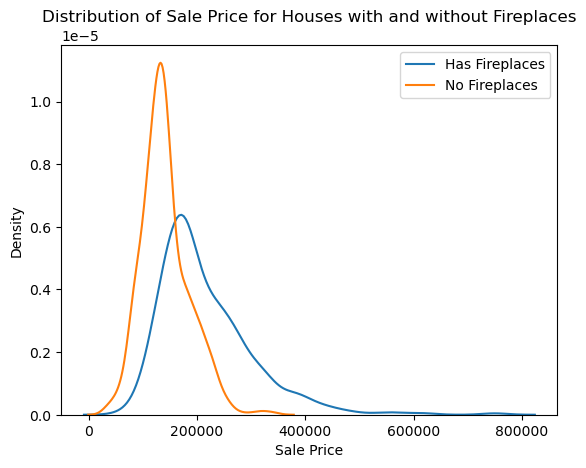

In [169]:
saleprice_fireplace = data_3[data_3.has_fireplaces]['SalePrice']
saleprice_no_fireplace = data_3[~data_3.has_fireplaces]['SalePrice']

# Plotting the distributions using KDE plot
sns.kdeplot(saleprice_fireplace, label='Has Fireplaces')
sns.kdeplot(saleprice_no_fireplace, label='No Fireplaces')

plt.legend()
plt.xlabel('Sale Price')
plt.title('Distribution of Sale Price for Houses with and without Fireplaces')

plt.show()

Для порівняння двох розподілів ціни для будівель з та без каміну ми провели KS тест. Отримане значення pvalue є дуже малим (1.4719627539480874e-78), що свідчить про те, що розподіли цін для будівель з та без каміну відрізняються. Для кращого розуміння, як саме відрізняються розподіли, я побудувала графік.

# Завдання 4

Проаналізуємо чи типи будинків (BldgType) одинаково розподілені по зонах (MSZoning). Виберіть правильний тест для порівняння двох категорій, проведіть його і опишіть результати.

In [170]:
contingency_table = pd.crosstab(data_3['BldgType'], data_3['MSZoning'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"χ² = {chi2}")
print(f"p-value = {p}")
print(f"Degrees of Freedom = {dof}")

χ² = 222.95209456537017
p-value = 1.7470289640148326e-38
Degrees of Freedom = 16


In [171]:
contingency_table

MSZoning,C (all),FV,RH,RL,RM
BldgType,,,,,
1Fam,9,38,9,1025,139
2fmCon,1,0,2,16,12
Duplex,0,0,3,43,6
Twnhs,0,9,0,10,24
TwnhsE,0,18,2,57,37


In [172]:
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=222.95209456537017, pvalue=1.7470289640148326e-38, dof=16, expected_freq=array([[8.35616438e+00, 5.43150685e+01, 1.33698630e+01, 9.61794521e+02,
        1.82164384e+02],
       [2.12328767e-01, 1.38013699e+00, 3.39726027e-01, 2.44390411e+01,
        4.62876712e+00],
       [3.56164384e-01, 2.31506849e+00, 5.69863014e-01, 4.09945205e+01,
        7.76438356e+00],
       [2.94520548e-01, 1.91438356e+00, 4.71232877e-01, 3.38993151e+01,
        6.42054795e+00],
       [7.80821918e-01, 5.07534247e+00, 1.24931507e+00, 8.98726027e+01,
        1.70219178e+01]]))

Для того, щоб проаналізувати чи типи будинків (BldgType) одинаково розподілені по зонах (MSZoning) ми провели Хі-квадрат тест. Отримане значення pvalue є дуже малим (1.7470289640148326e-38), що дозволяє спростувати нульову гіпотезу (категорії не є залежними). Відповідно, ми можемо стверджувати, що категорії є залежними.

За допомогою референс таблиці ми можемо визначити який був би розподіл, якби дві категорії були б незалежні. Як приклад, якщо б BldgType та MSZoning були незалежними, тоді ми б очікували, що кількість будинків з BldgType "1Fam" та MSZoning "C (all)" була б 8,35, коли по факту у нас є 9; кількість будинків з BldgType "1Fam" та MSZoning "FV" була б 54, коли по факту у нає є 38; кількість будинків з BldgType "1Fam" та MSZoning "RH" була б 13, коли по факту у нає є 9; кількість будинків з BldgType "1Fam" та MSZoning "RL" була б 961, коли по факту у нає є 1025; ількість будинків з BldgType "1Fam" та MSZoning "RM" була б 182, коли по факту у нає є 139 і тд.

Отримані результати свідчать про те, що розподіл типів будинків (BldgType) суттєво відрізняється в різних зонах (MSZoning). Велике значення статистики хі-квадрат та дуже малий p-value свідчать про статистичну значимість цієї різниці. Таким чином, ми можемо відхилити нульову гіпотезу про однаковий розподіл типів будинків у різних зонах на користь альтернативної гіпотези про їх різноманітність.

Велике значення статистики Хі-квадрат (222.95209456537017) вказує на значущі відмінності між спостережуваними та очікуваними частотами розподілу типів будинків у різних зонах. Оскільки, дані відрізняються від очікуваних, тому Хі-квадрат і показав, що значима різниця існує, відповідно дві категорії пов'язані.